# Inspecting predicted fluxes

In this tutorial we will load and inspect the fluxes predicted by the _Bacillus subtilis_ ME-model.

## Import libraries

In [1]:
from coralme.builder.main import MEBuilder
from coralme.util.flux_analysis import flux_based_reactions
import coralme
import pandas
import tqdm

## Load

Load the ME-model coming out of the Troubleshooter as a JSON

In [2]:
me = coralme.io.json.load_json_me_model("./bsubtilis/MEModel-step3-bsubtilis-TS.json")

Adding Metabolites into the ME-model...                                    : 100.0%|██████████|  4630/ 4630 [00:00<00:00]
Adding ProcessData into the ME-model...                                    : 100.0%|██████████|  4752/ 4752 [00:00<00:00]
Adding Reactions into the ME-model...                                      : 100.0%|██████████|  7758/ 7758 [00:18<00:00]
Updating ME-model Reactions...                                             : 100.0%|██████████|  6369/ 6369 [00:25<00:00]


## Solve

In [3]:
me.optimize()

The MINOS and quad MINOS solvers are a courtesy of Prof Michael A. Saunders. Please cite Ma, D., Yang, L., Fleming, R. et al. Reliable and efficient solution of genome-scale models of Metabolism and macromolecular Expression. Sci Rep 7, 40863 (2017). https://doi.org/10.1038/srep40863

Iteration	 Solution to check	Solver Status
---------	------------------	-------------
        1	1.4050280687025918	Not feasible
        2	0.7025140343512959	Not feasible
        3	0.3512570171756479	Not feasible
        4	0.1756285085878240	Not feasible
        5	0.0878142542939120	Optimal
        6	0.1317213814408680	Not feasible
        7	0.1097678178673900	Not feasible
        8	0.0987910360806510	Optimal
        9	0.1042794269740205	Not feasible
       10	0.1015352315273357	Not feasible
       11	0.1001631338039934	Optimal
       12	0.1008491826656645	Optimal
       13	0.1011922070965001	Optimal
       14	0.1013637193119179	Not feasible
       15	0.1012779632042090	Optimal
       16	0.1013208412580635

True

## Inspecting fluxes

### Predicted fluxes

In [4]:
fluxes = me.solution.to_frame()
fluxes

,fluxes,reduced_costs
biomass_dilution,1.012793e-01,-5.648980e-01
BSU15140-MONOMER_to_generic_16Sm4Cm1402,1.506864e-12,-1.792344e-33
RNA_BSU_rRNA_1_to_generic_16s_rRNAs,1.465206e-06,-1.448997e-32
RNA_BSU_rRNA_16_to_generic_16s_rRNAs,0.000000e+00,-6.326530e-02
RNA_BSU_rRNA_19_to_generic_16s_rRNAs,5.674343e-07,-1.849227e-32
...,...,...
translocation_BSU25290_Plasma_Membrane,3.013728e-12,-4.779545e-34
translocation_BSU27650_Plasma_Membrane,1.354157e-06,0.000000e+00
translocation_BSU33630_Plasma_Membrane,1.370728e-06,0.000000e+00
translocation_BSU35300_Plasma_Membrane,1.354988e-06,3.520845e-34


### Biomass production

In [5]:
fluxes[fluxes.index.str.contains("biomass")]

,fluxes,reduced_costs
biomass_dilution,0.101279,-5.648980e-01
protein_biomass_to_biomass,0.034953,-2.375644e-34
mRNA_biomass_to_biomass,0.000116,-1.199677e-34
tRNA_biomass_to_biomass,0.000700,0.000000e+00
rRNA_biomass_to_biomass,0.005100,-7.874817e-35
ncRNA_biomass_to_biomass,0.000000,7.391429e-35
tmRNA_biomass_to_biomass,0.000000,7.391429e-35
DNA_biomass_to_biomass,0.006003,7.391429e-35
lipid_biomass_to_biomass,0.023282,7.391429e-35
constituent_biomass_to_biomass,0.011441,7.391429e-35


### Transcription rates

In [6]:
fluxes[fluxes.index.str.contains("^transcription_")].head()

,fluxes,reduced_costs
transcription_TU8J2-1243_from_BSU25200-MONOMER,0.000000e+00,-6.246011e-33
transcription_TU8J2-569_from_BSU25200-MONOMER,2.160400e-08,7.605084e-32
transcription_TU8J2-1577_from_BSU25200-MONOMER,0.000000e+00,-6.986124e-32
transcription_TU8J2-257_from_BSU25200-MONOMER,0.000000e+00,-1.127560e+03
transcription_TU8J2-677_from_BSU25200-MONOMER,1.736594e-08,-1.447121e-32


### Translation rates

In [7]:
fluxes[fluxes.index.str.contains("^translation_")].head()

,fluxes,reduced_costs
translation_BSU00090,1.419685e-08,-1.712708e-32
translation_BSU00110,6.498762e-13,-6.375952e-33
translation_BSU00120,6.498762e-13,-6.911721e-33
translation_BSU00130,2.293786e-08,2.102613e-32
translation_BSU00140,5.327400e-11,9.486318e-33


## Biomass profile

We can calculate the predicted biomass composition in this condition by using _flux_based_reactions_ which outputs the mass balance of a metabolite

In [8]:
flux_based_reactions(me,"biomass")

,lb,ub,rxn_flux,met_flux,reaction
biomass_dilution,mu,mu,0.101279,-0.101279,1.0 biomass -->
protein_biomass_to_biomass,0.0,1000.0,0.034953,0.054615,1.0 protein_biomass + 0.5625 unmodeled_protein...
lipid_biomass_to_biomass,0.0,1000.0,0.023282,0.023282,1.0 lipid_biomass --> 1.0 biomass
constituent_biomass_to_biomass,0.0,1000.0,0.011441,0.011441,1.0 constituent_biomass --> 1.0 biomass
DNA_biomass_to_biomass,0.0,1000.0,0.006003,0.006003,1.0 DNA_biomass --> 1.0 biomass
rRNA_biomass_to_biomass,0.0,1000.0,0.005100,0.005100,1.0 rRNA_biomass --> 1.0 biomass
tRNA_biomass_to_biomass,0.0,1000.0,0.000700,0.000700,1.0 tRNA_biomass --> 1.0 biomass
mRNA_biomass_to_biomass,0.0,1000.0,0.000116,0.000116,1.0 mRNA_biomass --> 1.0 biomass
prosthetic_group_biomass_to_biomass,0.0,1000.0,0.000023,0.000023,1.0 prosthetic_group_biomass --> 1.0 biomass
tmRNA_biomass_to_biomass,0.0,1000.0,0.000000,0.000000,1.0 tmRNA_biomass --> 1.0 biomass


<Axes: ylabel='met_flux'>

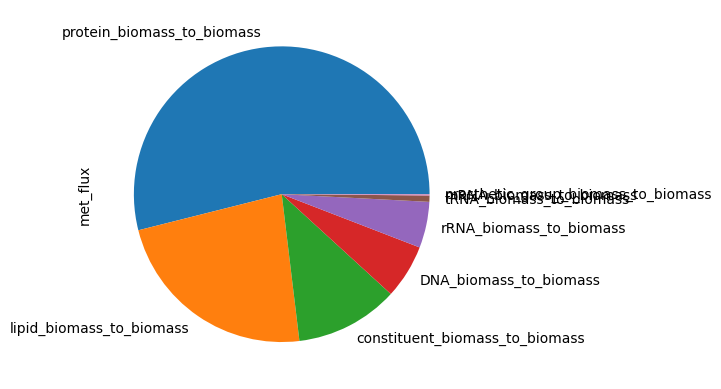

In [9]:
tmp = flux_based_reactions(me,"biomass")["met_flux"]
BiomassComponents = tmp[tmp>0]
BiomassComponents.plot.pie()